In [1]:
import pandas as pd
X = pd.read_csv('../data/tree_class_feats.csv')
y = pd.read_csv('../data/tree_class_target.csv')

from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from tensorflow import random

np.random.seed(seed)
random.set_seed(seed)

model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='sgd', loss='binary_crossentropy')

history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0, shuffle=False)

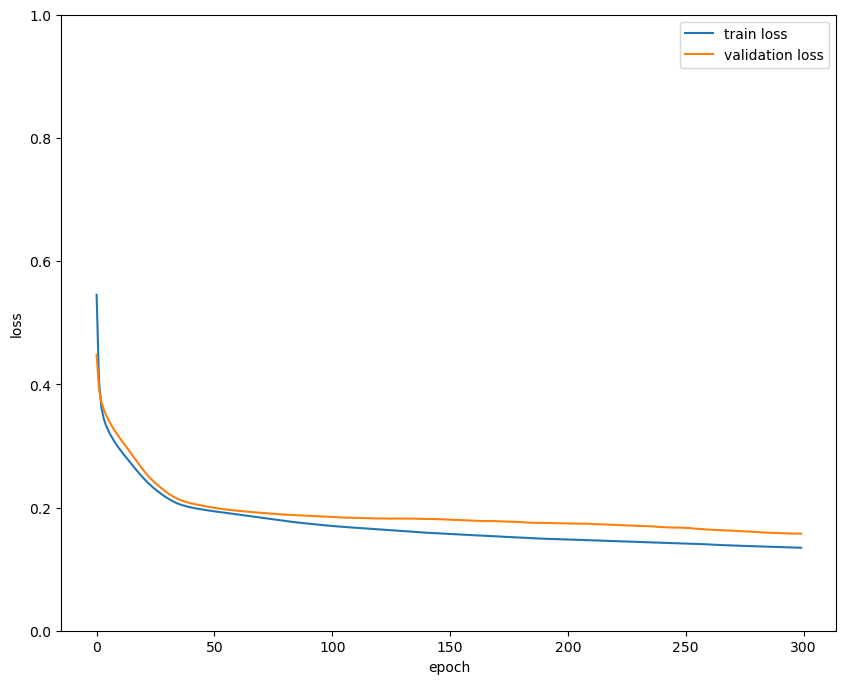

In [6]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [11]:
from keras.callbacks import EarlyStopping
np.random.seed(seed)
random.set_seed(seed)

model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='sgd', loss='binary_crossentropy')

es_callback = EarlyStopping(monitor='val_loss', mode='min')

history = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0, shuffle=False, callbacks=[es_callback])

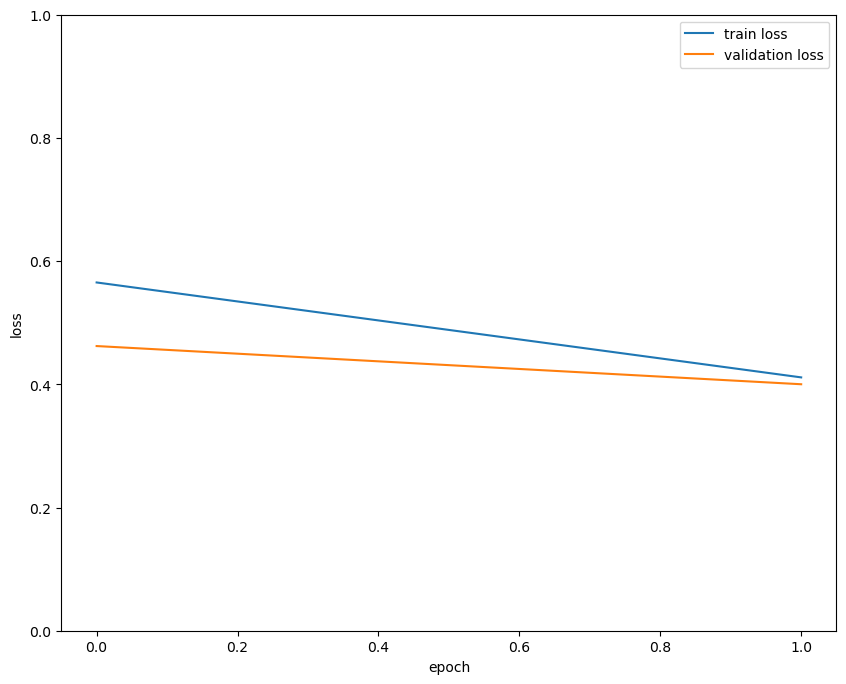

In [12]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [13]:
np.random.seed(seed)
random.set_seed(seed)

model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(4, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer='sgd', loss='binary_crossentropy')

es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)

history = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0, shuffle=False, callbacks=[es_callback])

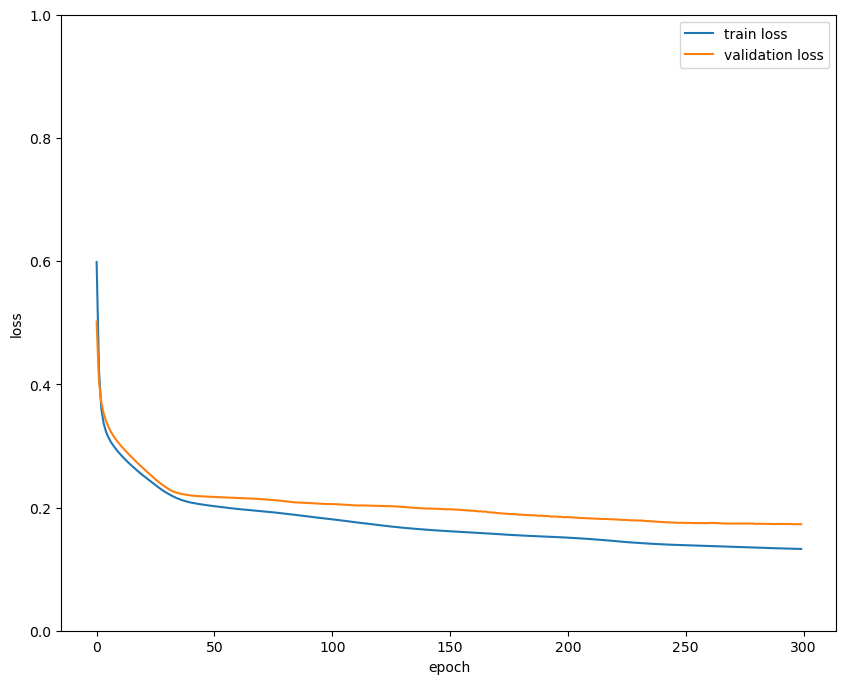

In [14]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')